In [1]:
from PIL import Image
import numpy as np
import os
import sys

In [2]:
import glob  #file pattern matching


In [3]:
print(os.getcwd())

C:\Users\pramo\Downloads\face-to-bmi\Data


#to resize all the images to 150*150 size
width=150
height=150
img_num=0
for filename in glob.glob('Images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    im=Image.open(filename).convert('L')#pillow to load image and convert to greyscale image
    out=im.resize((width,height),Image.ANTIALIAS)
    out.save("C:/Users/pramo/Downloads/face-to-bmi/Data/Resize_images/img_{}.bmp".format(img_num))
    img_num+=1
   

In [4]:
image_list=[]
for filename in glob.glob('Resize_images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    img=Image.open(filename)#pillow to load image
    image_list.append(img)#adding images to image_list


In [5]:
len(image_list)

4206

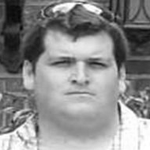

In [6]:
image_list[67]

In [7]:
#to find max size picture
maxx=0
count=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    #print(arr.shape)
    if(str(arr.shape)!='(52, 41)'):
        count+=1
print(count)
    #if(maxx<arr.size):
     #   maxx=arr.size
      #  string=str(arr.shape)
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
#print(maxx,string)      

4206


In [8]:
meeee=np.array(image_list[0])
meee=meeee.flatten()
meee.shape

(22500,)

In [9]:
#to find min size picture
minn_x=np.array(image_list[0])
minn=minn_x.size
img_c=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    if(minn>arr.size):
        print(img_c)
        minn=arr.size
        string_min="hiwdd"
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
print(minn) 

22500


In [10]:
x=np.empty([1,3])
a=np.array([[11,2,3]])
b=np.array([[1,22,13]])
a.shape
a=np.append(a,b,axis=0)
#vvv=np.array(image_list[0])
#vvv=vvv.flatten()
#vvv=vvv.reshape(1,22500)
a

array([[11,  2,  3],
       [ 1, 22, 13]])

In [11]:
#to convert images to array=>1d array=>2d array 
#appending all the image vectors to X_img vector
temp=1
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    arr_1d=arr.flatten()#to convert into 1D array
    arr_2d=arr_1d.reshape(1,22500) #to convert 1D to 2D array
    if(temp==1):
        X_img=arr_2d
        temp=0
    else:
        X_img=np.append(X_img,arr_2d,axis=0)#to add new rows to the X_image data



In [12]:
X_img.shape

(4206, 22500)

In [13]:
#standardising data(setting mean=0,variance=1)
from sklearn.preprocessing import StandardScaler

In [14]:
X_P_img=StandardScaler().fit_transform(X_img)

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:

from sklearn.decomposition import PCA

In [16]:
#princinple components choosen should be 95% of variance
pca=PCA(.85)

In [17]:
#to find out principle components from X_P_img
pca.fit(X_P_img)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
#no:of principle components
pca.n_components_

72

In [19]:
X_P_img=pca.transform(X_P_img)

In [20]:
X_P_img.shape

(4206, 72)

In [21]:

import pandas as pd
#to read_csv file
data_unclean=pd.read_csv('data.csv')
#to show top 5rows
data_unclean.head()



,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [22]:
#to remove unnamed coloums in data
data=data_unclean.loc[:,~data_unclean.columns.str.contains('^Unnamed')]

data.head()



,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [23]:
#should include is_training?
x_train=data.loc[:,['gender']]

x_train.head()


,gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [24]:
from sklearn.preprocessing import LabelEncoder#to convert categorical data to numerical data(gender col)

In [25]:
number=LabelEncoder()


In [26]:
x_train=number.fit_transform(x_train['gender'].astype('str'))

In [27]:
x_train=x_train.reshape(4206,1)

In [28]:
y_train=data.loc[:,['bmi']]
y_train=np.array(y_train)
y_train.shape

(4206, 1)

In [29]:
X_train=np.append(x_train,X_P_img,axis=1)
X_train.shape

(4206, 73)

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)

In [32]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.0,28.541109,43.730973,-24.923860,-80.688394,-24.810123,-41.973450,60.541837,5.382187,21.644851,...,7.895019,4.879759,-6.488605,2.619478,-0.845663,-3.805379,4.282453,-0.015107,1.537607,-4.439821
1,0.0,-147.776159,20.737065,10.280461,-30.907513,9.084130,-25.008205,-4.148136,13.172986,-12.745088,...,-9.633044,9.562135,-6.991344,5.810539,3.669099,9.767436,0.578746,-2.671037,-2.113136,0.592438
2,1.0,28.681840,110.594142,16.393914,-6.849228,-21.752303,0.955443,11.320275,-26.085834,-14.590791,...,0.565850,1.985244,5.111309,-7.067639,-4.333954,4.006771,-0.382538,8.073645,-0.836747,-2.970144
3,1.0,-1.693324,-78.384990,-58.662268,56.284281,-23.923125,11.157010,12.608155,-2.675988,14.025577,...,0.916583,-6.606057,5.933249,4.319128,3.328294,-0.234693,3.475258,-2.781473,2.418960,7.006800
4,0.0,-75.462927,39.233644,44.535700,38.200838,49.165508,64.718817,48.694343,-20.515297,-13.385756,...,17.162396,-1.743598,1.289449,4.214364,-5.479574,-0.438564,1.034757,-9.566917,-7.098501,4.055820
5,1.0,-7.446955,-105.237036,-83.489197,-72.305320,-23.100755,14.960418,-45.285620,-13.678422,21.907766,...,-2.983824,-14.629128,-2.584219,7.072197,3.624180,-18.688663,2.794486,2.760313,-3.827718,3.577240
6,0.0,37.224544,-5.051858,0.737917,-27.493201,-24.655884,12.492675,3.411911,21.928095,3.303371,...,4.593830,-1.736070,1.502777,3.015302,-1.873982,-1.146850,-1.667626,-6.776998,0.100321,-0.158409
7,1.0,85.026359,-5.263942,35.670937,-79.314991,3.683050,-57.960827,78.047826,-16.591418,8.692242,...,8.742497,-4.602088,1.188836,7.041638,4.114951,-12.741009,-11.399629,-7.257233,-7.139341,4.901408
8,1.0,64.093519,89.949390,55.587796,41.099098,21.528684,23.452709,7.701015,6.062944,20.764323,...,3.153079,4.348138,2.551317,1.761393,-6.827117,-0.419498,-0.497825,-2.641009,-5.562908,0.531924
9,1.0,6.579729,0.726211,1.539385,10.774049,-28.904586,33.617630,-22.598351,-4.903371,-8.864788,...,2.044134,-11.260060,8.595816,-3.349634,-5.311885,-1.169578,-7.885051,-1.850652,-5.166001,-10.072451


In [33]:
X_test.shape

(421, 73)

In [34]:
X_train.shape

(3785, 73)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linear=LinearRegression()

In [37]:
model=linear.fit(X_train,y_train)

In [38]:
prediction=model.predict(X_test)

In [39]:
prediction

array([[34.0908414 ],
       [31.42288192],
       [31.72199774],
       [32.71894778],
       [33.20343263],
       [32.61246675],
       [32.089132  ],
       [32.02279178],
       [33.30491668],
       [31.62172897],
       [32.40081571],
       [32.88120173],
       [35.66597039],
       [33.01607875],
       [33.56322815],
       [31.81720136],
       [33.89886267],
       [33.41486412],
       [32.78343136],
       [33.46135774],
       [35.35918234],
       [33.42545918],
       [32.59463332],
       [32.09983934],
       [33.61447228],
       [33.40830474],
       [34.95282878],
       [32.90303331],
       [32.9169689 ],
       [32.617427  ],
       [31.61589799],
       [33.91225361],
       [31.84391147],
       [31.94305853],
       [36.09758819],
       [32.08571537],
       [31.47771662],
       [34.42891212],
       [33.25184406],
       [31.60636312],
       [31.85610798],
       [31.12838471],
       [33.72003618],
       [32.76818571],
       [32.50373921],
       [33

In [40]:
score=model.score(X_test,y_test)


In [41]:
print("score on linear regression:{}".format(score))

score on linear regression:-0.027425861295126808


In [42]:
from  matplotlib import pyplot as plt 

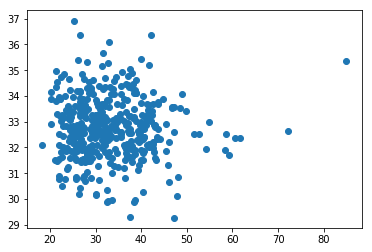

In [43]:
plt.scatter(y_test,prediction)

In [44]:
plt_y_test=pd.DataFrame(y_test)